In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import interpolate
from adjustText import adjust_text
from pybaseball import batting_stats_range
import pybaseball
import pandas as pd
from pybaseball import statcast
from pybaseball import pitching_stats
from pybaseball import batting_stats
from adjustText import adjust_text

In [2]:
df_OPS = pd.read_csv ('/Users/lloydkirwan/Desktop/MLB Coding Stuff/WS Teams OPS since 1961.csv')
print (df_OPS)

     Season Team   W  L  HR  RBI     BA    OBP    SLG   OPS▼  R/Gm
0      2007  BOS  11  3  18   96  0.313  0.395  0.517  0.911   7.1
1      1970  BAL   7  1  16   57  0.307  0.378  0.525  0.903   7.5
2      1989  OAK   8  1  16   53  0.286  0.367  0.526  0.893   6.4
3      2002  ANA  11  5  24   95  0.320  0.367  0.512  0.879   6.3
4      1976  CIN   7  0   7   39  0.288  0.355  0.494  0.848   5.9
..      ...  ...  .. ..  ..  ...    ...    ...    ...    ...   ...
117    1972  OAK   7  5   6   26  0.215  0.283  0.292  0.575   2.4
118    1961  CIN   1  4   3   11  0.206  0.254  0.306  0.560   2.6
119    1962  NYY   4  3   3   17  0.199  0.273  0.276  0.549   2.9
120    1963  NYY   0  4   2    4  0.171  0.207  0.240  0.448   1.0
121    1966  LAD   0  4   1    2  0.142  0.226  0.192  0.417   0.5

[122 rows x 11 columns]


In [3]:
df_ERA = pd.read_csv ('/Users/lloydkirwan/Desktop/MLB Coding Stuff/WS Teams Pitching by ERA since 1961.csv')

print(df_ERA)

     Season Team  ERA▲     IP   SO   WHIP  SO9
0      1966  BAL  0.50   36.0   28  0.833  7.0
1      1963  LAD  1.00   36.0   37  0.750  9.3
2      1983  BAL  1.10   82.0   55  0.951  6.0
3      1961  NYY  1.60   45.0   27  0.956  5.4
4      1973  NYM  1.84  112.1  104  1.095  8.3
..      ...  ...   ...    ...  ...    ...  ...
117    1961  CIN  4.91   44.0   25  1.500  5.1
118    1984  SDP  4.98   85.0   55  1.482  5.8
119    1976  NYY  5.03   78.2   34  1.335  3.9
120    1989  SFG  5.88   78.0   49  1.679  5.7
121    1993  PHI  6.04  107.1   84  1.575  7.0

[122 rows x 7 columns]


In [4]:
merged_data = df_OPS.merge(df_ERA,on=["Season"])
merged_data.drop_duplicates(subset=['Season'], keep='first', inplace=True, ignore_index=True)
df_final = merged_data
print(df_final)

    Season Team_x   W  L  HR  RBI     BA    OBP    SLG   OPS▼  R/Gm Team_y  \
0     2007    BOS  11  3  18   96  0.313  0.395  0.517  0.911   7.1    BOS   
1     1970    BAL   7  1  16   57  0.307  0.378  0.525  0.903   7.5    BAL   
2     1989    OAK   8  1  16   53  0.286  0.367  0.526  0.893   6.4    OAK   
3     2002    ANA  11  5  24   95  0.320  0.367  0.512  0.879   6.3    SFG   
4     1976    CIN   7  0   7   39  0.288  0.355  0.494  0.848   5.9    CIN   
..     ...    ...  .. ..  ..  ...    ...    ...    ...    ...   ...    ...   
56    1972    CIN   6  6   7   37  0.228  0.294  0.342  0.636   3.3    OAK   
57    1967    BOS   3  4   8   19  0.216  0.276  0.360  0.636   3.0    STL   
58    1963    LAD   4  0   3   12  0.214  0.279  0.350  0.629   3.0    LAD   
59    1962    SFG   3  4   5   19  0.226  0.268  0.354  0.622   3.0    SFG   
60    1966    BAL   4  0   4   10  0.200  0.267  0.342  0.609   3.3    BAL   

    ERA▲     IP   SO   WHIP  SO9  
0   3.29  126.0  119  1.135 

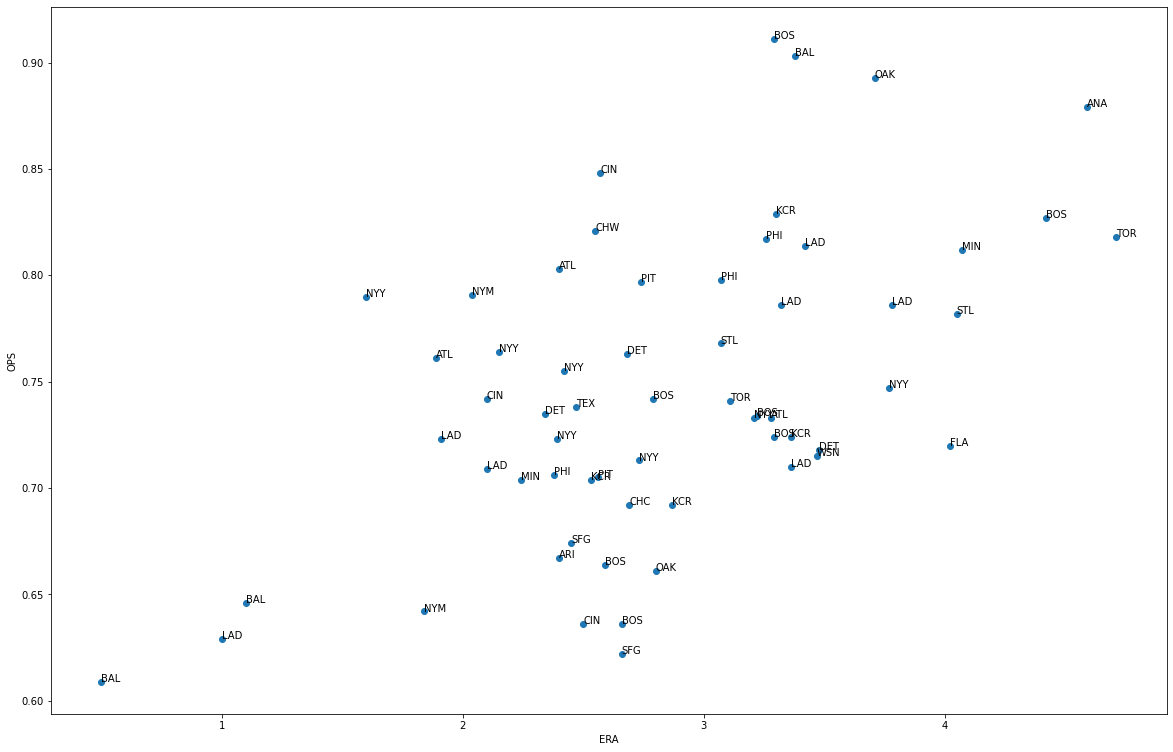

In [6]:
from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(20,13))
ax.scatter(x = df_final['ERA▲'], y = df_final['OPS▼'])
ax.set_xlabel('ERA')
ax.set_ylabel('OPS')
for idx, row in df_final.iterrows():
    ax.annotate(row['Team_x'], (row['ERA▲'], row['OPS▼']) ) 